In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [ ]:
!wget "http://leg.ufpr.br/~walmes/data/euro_football_players.txt" 

# Passos

## Linhas sem dados
Ao abrir o arquivo, percebemos que ele possui linhas de instruções antes do início da tabela de dados. Isso impede a leitura correta pelo Pandas.
Solução:
Usar o parâmetro skiprows=n, onde n é o número de linhas a serem ignoradas no início do arquivo:

## Separados de dados
Por padrão, o pandas.read_csv() considera que os dados são separados por vírgulas. Porém, alguns arquivos utilizam espaços em branco ou tabulações como separador. Por conta disso, precisaremos informar ao pandas através do comando **sep = ''** que tipo de separador está sendo utilizado.
Obs. Nesse caso, onde estão sendo utilizado espaços em branco, colocamos '\t' dentro do valor de sep.

Ex. pd.read_csv('nome_arquivo', sep='\t')

## Remoção de dados faltantes

### Técnicas

1. Remoção de linhas ou colunas com dados nulos;
2. Substituição por média, mediana ou moda;
3. Interpolação ou extrapolação de dados;
4. Previsão de valores baseado em modelos de machine learning;
5. Atribuição de valor zero ou outro valor constante.

O metodo apropriado, depende do contexto e da quantidade de dados nulos. Importante avaliar a influência dos dados nulos no resultado final antes de tomar uma decisão sobre como tratá-los.

### Removendo as linhas/colunas

Utilizando o comando df.dropna(axis = 0/1), podemos realizar a exclusão de linhas e colunas sem com dados nulos. Ao utilizar axis = 0, retiraremos as linhas que apresentem dados nulos, ao utilizar axis = 1, retiraremos as colunas
Obs. foi utilizado o comando inplace = True para que o resultado do código substituisse diretamente o df, ao invés de criar uma nova cópia. Exemplificando, seria como se houvessemos escrito df = df.dropna(axis = 0), fazendo com que o resultado fosse salvo dentro da mesma variável.

### Substituição por Média, mediana ou moda

**Média**

Podemos fazer a substituição dos dados nulos utilizando o valor da média dos dados existentes na planilha, como no caso abaixo, especificamos para o sistema realizar o preenchimento dos espaços nulos com a função fillna, utilizando os valores da média de cm dentro do dataframe e depois, salvar o resultado deste valor dentro do próprio dataframe.

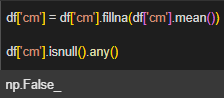

Após a alteração, foi realizado a verificação da existência de valores nulos na coluna cm, tendo um retorno False do sistema, o que indica que as substituições foram realizadas.

**Mediana**

Para realizar essa interação com a mediana, pode ser usado o mesmo tipo de interação

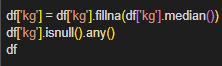

**Moda**

Para utilizarmos a moda, podemos usar também a mesma interação, tendo somente um cuidado. Ao utilizar o comando mode, ele retorna um valor lista onde há o índice e o valor da moda. Caso em uma lista exista um empate na moda de mais de um valor, o programa os colocará em ordem crescente padrão, em ordem alfabética em caso de strings e em caso de datas, da mais antiga para a mais recente.

| Retorno .mode | Retorno em caso de empate |
| ------------------- | --------------------------------------  |
| 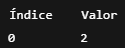 | 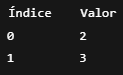 |


Por conta dessa interação, precisamos definir no código qual valor do indice deverá ser usado, para isso, utilizamos o .iloc[valor_do_indice].


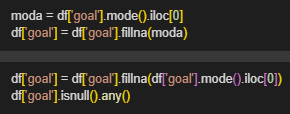

## Tipos de cópia de DataFrame

1. Superficial - copy.copy(data)

  Modificações feitas na cópia afetarão o documento principal.
2. Profunda - copy.deepcopy(data)

  Modificações realizadas na cópia, não afetarão o documento principal, é feita uma cópia profunda, ocupando mais espaço na memória.

In [ ]:
data = pd.read_csv('euro_football_players.txt', skiprows= 27, sep = '\t')
data

In [ ]:
df = copy.deepcopy(data)

In [ ]:
df['cm'] = df['cm'].fillna(df['cm'].mean())
df['cm'].isnull().any()

In [ ]:
df['kg'] = df['kg'].fillna(df['kg'].median())
df['kg'].isnull().any()

In [ ]:
moda = df['goal'].mode().iloc[0]
df['goal'] = df['goal'].fillna(moda)

In [ ]:
df['goal'] = df['goal'].fillna(df['goal'].mode().iloc[0])
df['goal'].isnull().any()

In [ ]:
df['ass'] = df['ass'].fillna(0)
df

In [ ]:
df

,country,team,name,pos,age,cm,kg,apps,goal,ass,yel,red,spg,ps,aw,mom,rt
0,Austria,Salzburg,Sadio Mané,M(L),21.0,175.000000,69.0,9,4.0,3.0,1.0,1.0,2.0,77.0,1.2,3.0,7.98
1,Austria,Salzburg,Kevin Kampl,M(R),23.0,180.000000,63.0,9,2.0,4.0,2.0,NaN,2.0,83.9,0.3,1.0,7.93
2,Austria,Salzburg,Alan,FW,24.0,182.000000,73.0,8(1),4.0,2.0,NaN,1.0,4.2,60.8,3.8,2.0,7.91
3,Austria,Salzburg,André Ramalho,D(C),22.0,182.000000,77.0,9,1.0,0.0,4.0,NaN,0.9,72.3,3.2,1.0,7.67
4,Austria,Salzburg,Stefan Hierländer,M,23.0,180.000000,71.0,1(1),1.0,0.0,NaN,NaN,0.5,86.3,3.0,NaN,7.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,Norway,Tromsø,Josh Pritchard,M,21.0,175.000000,71.0,2(1),1.0,0.0,NaN,NaN,0.7,76.6,0.3,NaN,6.06
1524,Norway,Tromsø,Steffen Nystrom,FW,29.0,180.000000,73.0,2(1),1.0,0.0,NaN,NaN,0.7,76.2,0.3,NaN,5.86
1525,Norway,Tromsø,Miika Koppinen,D,35.0,188.000000,80.0,1,1.0,0.0,NaN,NaN,NaN,76.9,NaN,NaN,5.84
1526,Norway,Tromsø,Fredrik Bakkelund,GK,17.0,181.805402,75.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


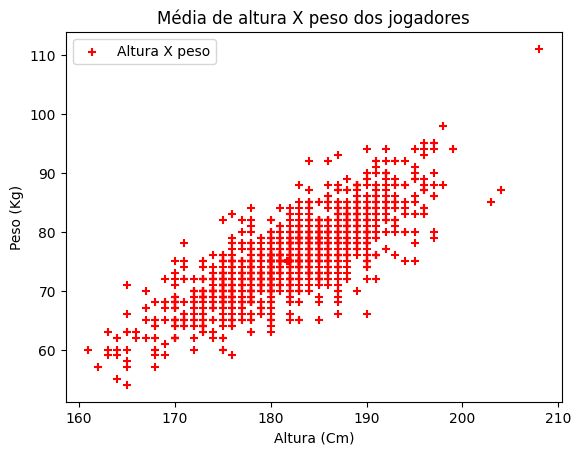

In [ ]:
plt.title('Média de altura X peso dos jogadores')
plt.scatter(df['cm'], df['kg'], color = 'red', marker= '+', label = 'Altura X peso')
plt.xlabel('Altura (Cm)')
plt.ylabel('Peso (Kg)')
plt.legend()

plt.show()

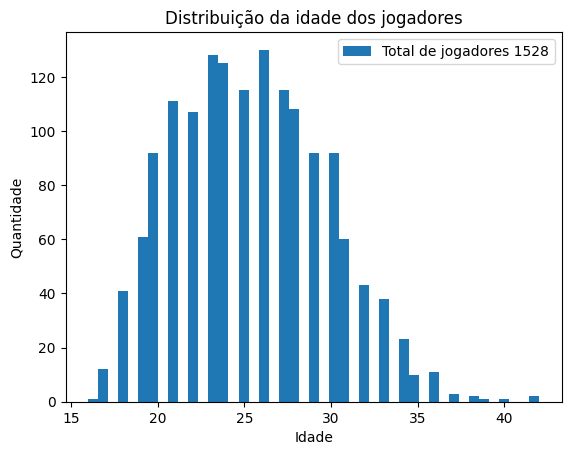

In [ ]:
plt.hist(df['age'], bins = 45, label= 'Total de jogadores {}'.format(df['name'].count()))
plt.title('Distribuição da idade dos jogadores')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.legend()
plt.show()

In [ ]:
a= df['age'].count()
a

np.int64(1524)

<ipython-input-104-3777703796>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


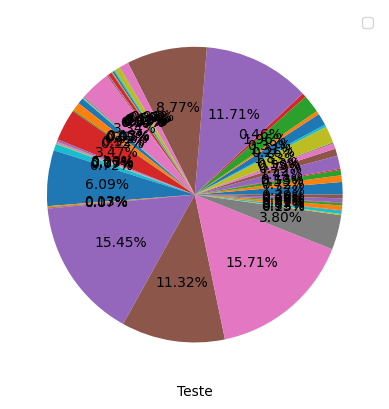

In [ ]:
pos = df.groupby(df['pos'])['pos'].count()
plt.pie(pos, autopct = '%.2f%%')
plt.xlabel('Teste')
plt.legend()